In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, chi2_contingency, f_oneway, shapiro, levene, bartlett

In [2]:
df = pd.read_csv('tmdb/merged_tmdb_data.csv')
df.head()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,tt0113026,0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127,en,The Fantasticks,...,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.500,22.0,NaN
1,tt0113092,0,NaN,NaN,0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977,en,For the Cause,...,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,0.0,5.450,10.0,NaN
2,tt0116391,0,NaN,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,442869,hi,Gang,...,0.0,152.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,NaN,Gang,0.0,4.000,1.0,NaN
3,tt0118694,0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,843,cn,花樣年華,...,14204632.0,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,0.0,8.106,2364.0,PG
4,tt0118852,0,/vceiGZ3uavAEHlTA7v0GjQsGVKe.jpg,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,49511,en,Chinese Coffee,...,0.0,99.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,There's a fine line between friendship and bet...,Chinese Coffee,0.0,6.625,56.0,R


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17103 entries, 0 to 17102
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                17103 non-null  object 
 1   adult                  17103 non-null  int64  
 2   backdrop_path          9611 non-null   object 
 3   belongs_to_collection  1310 non-null   object 
 4   budget                 17103 non-null  int64  
 5   genres                 17103 non-null  object 
 6   homepage               2799 non-null   object 
 7   id                     17103 non-null  int64  
 8   original_language      17103 non-null  object 
 9   original_title         17103 non-null  object 
 10  overview               16707 non-null  object 
 11  popularity             17102 non-null  float64
 12  poster_path            15177 non-null  object 
 13  production_companies   17102 non-null  object 
 14  production_countries   17102 non-null  object 
 15  re

In [4]:
df.replace(r'\\N', np.nan, inplace=True)

In [5]:
df.replace(r'\\N', np.nan, inplace=True)

# 1. Does the MPAA rating of a movie (G/PG/PG-13/R) affect how much revenue the movie generates?

In [6]:
# Performing ANOVA test
result = f_oneway(
    df['revenue'][df['certification'] == 'G'],
    df['revenue'][df['certification'] == 'PG'],
    df['revenue'][df['certification'] == 'PG-13'],
    df['revenue'][df['certification'] == 'R']
)

In [7]:
p_value = result.pvalue

In [8]:
# Reporting if there is a significant difference
if p_value < 0.05:
    print("There is a significant difference in revenue among certifications.")
else:
    print("There is no significant difference in revenue among certifications.")

There is a significant difference in revenue among certifications.


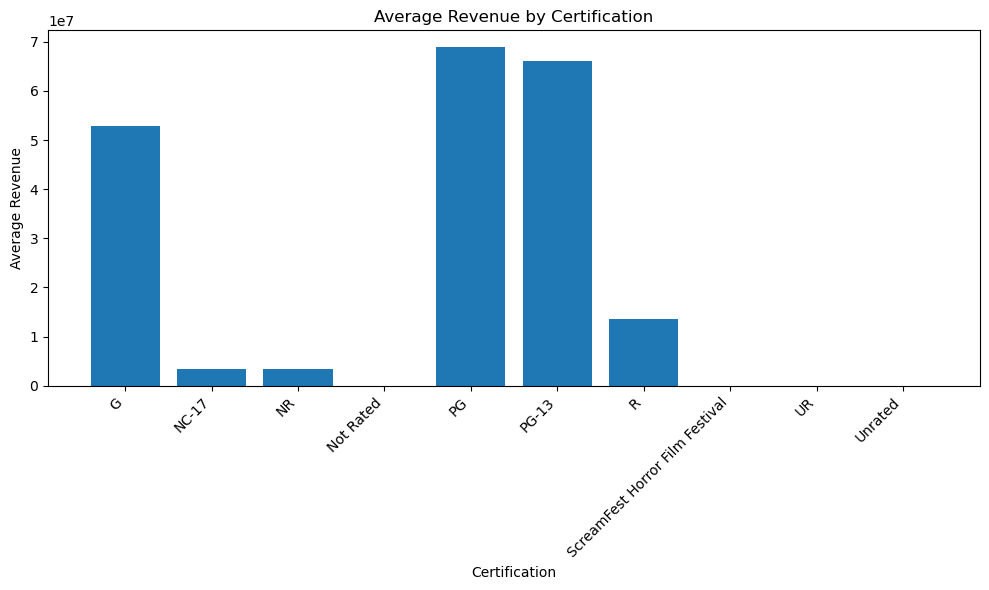

In [9]:
# Bar Plot
average_revenue_by_certification = df.groupby('certification')['revenue'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(average_revenue_by_certification['certification'], average_revenue_by_certification['revenue'])
plt.xlabel('Certification')
plt.ylabel('Average Revenue')
plt.title('Average Revenue by Certification')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 2. Does popularity have an impact on revenue?

In [10]:
import seaborn as sns

Correlation between revenue and popularity: 0.6722432392205315


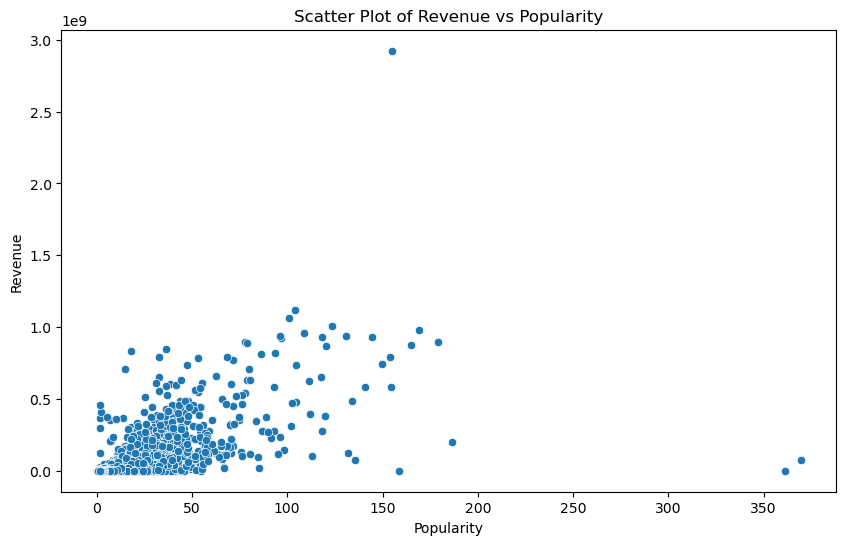

In [11]:
correlation = df['revenue'].corr(df['popularity'])

# Display the correlation coefficient
print(f"Correlation between revenue and popularity: {correlation}")

# Scatter plot to visualize the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(x='popularity', y='revenue', data=df)
plt.title('Scatter Plot of Revenue vs Popularity')
plt.xlabel('Popularity')
plt.ylabel('Revenue')
plt.show()

In [ ]:
- The graph shows that as popularity increases so does revenue

# 3. Do movies released in different times/dates impact revenue?

In [12]:
df['release_date']

0        22/09/2000
1        15/11/2000
2        14/04/2000
3        29/09/2000
4        02/09/2000
            ...    
17098    01/01/2009
17099    27/10/2009
17100    04/09/2009
17101    15/08/2009
17102    16/06/2009
Name: release_date, Length: 17103, dtype: object

C:\Users\om88920\AppData\Local\Temp\ipykernel_21888\3311922682.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')


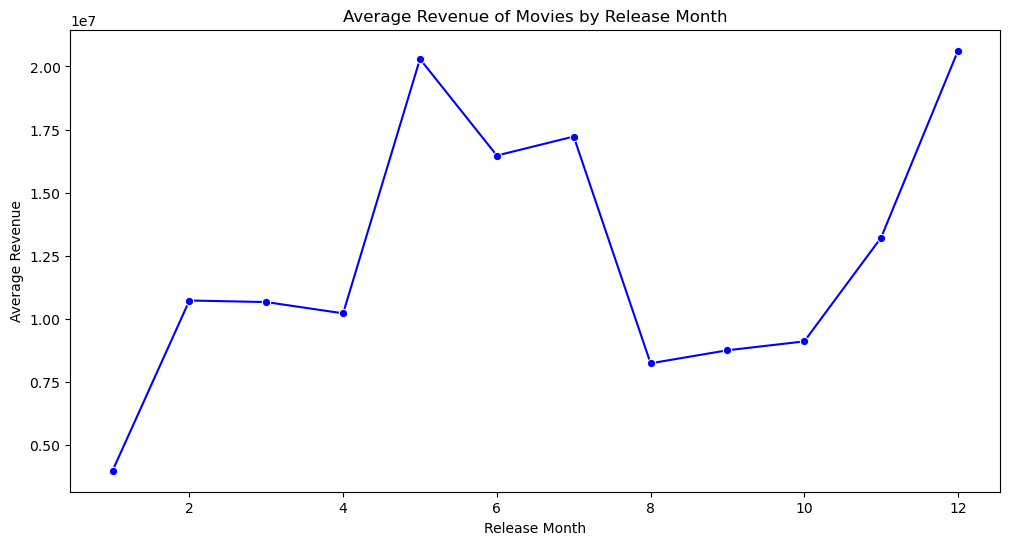

In [13]:
# Convert 'release_date' to datetime format
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

# Extract the month from the release date
df['release_month'] = df['release_date'].dt.month

# Group by release month and calculate the average revenue for each month
avg_revenue_by_month = df.groupby('release_month')['revenue'].mean().reset_index()

# Plot the results
plt.figure(figsize=(12, 6))
sns.lineplot(x='release_month', y='revenue', data=avg_revenue_by_month, marker='o', color='b')

# Add labels and title
plt.xlabel('Release Month')
plt.ylabel('Average Revenue')
plt.title('Average Revenue of Movies by Release Month')

# Show the plot
plt.show()

- Looks like average revenu spikes around May and December. School holidays perhaps?